<a href="https://colab.research.google.com/github/NicolasRodrigues23/Projeto_Startups/blob/main/projeto_startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
Base_Dados = pd.read_csv('startups_2022.csv')
Base_Dados.shape

(1186, 7)

In [188]:
Base_Dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [189]:
#Renomeação das colunas
Base_Dados.rename(columns={
    'Unnamed: 0':'ID',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($B)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry' : 'Setor',
    'Investors' : 'Investidores'
}, inplace=True)

In [190]:
#Verificando tipo da informação
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Empresa         1186 non-null   object
 1   Valor ($B)      1186 non-null   object
 2   Data de Adesão  1186 non-null   object
 3   Pais            1186 non-null   object
 4   City            1186 non-null   object
 5   Setor           1186 non-null   object
 6   Investidores    1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [191]:
#Checando a Quantidade de Valores Nulos
Base_Dados.isnull().sum()

,0
Empresa,0
Valor ($B),0
Data de Adesão,0
Pais,0
City,0
Setor,0
Investidores,18


In [192]:
#Checagem de Campos unicos
Base_Dados.nunique()

,0
Empresa,1183
Valor ($B),222
Data de Adesão,695
Pais,48
City,286
Setor,34
Investidores,1152


In [193]:
#Rank Por Setor
Base_Dados['Setor'].value_counts( normalize=True )

,proportion
Setor,
Fintech,0.201518
Internet software & services,0.188870
E-commerce & direct-to-consumer,0.086847
Health,0.079258
Artificial intelligence,0.062395
Other,0.054806
"Supply chain, logistics, & delivery",0.054806
Cybersecurity,0.048904
Data management & analytics,0.037943


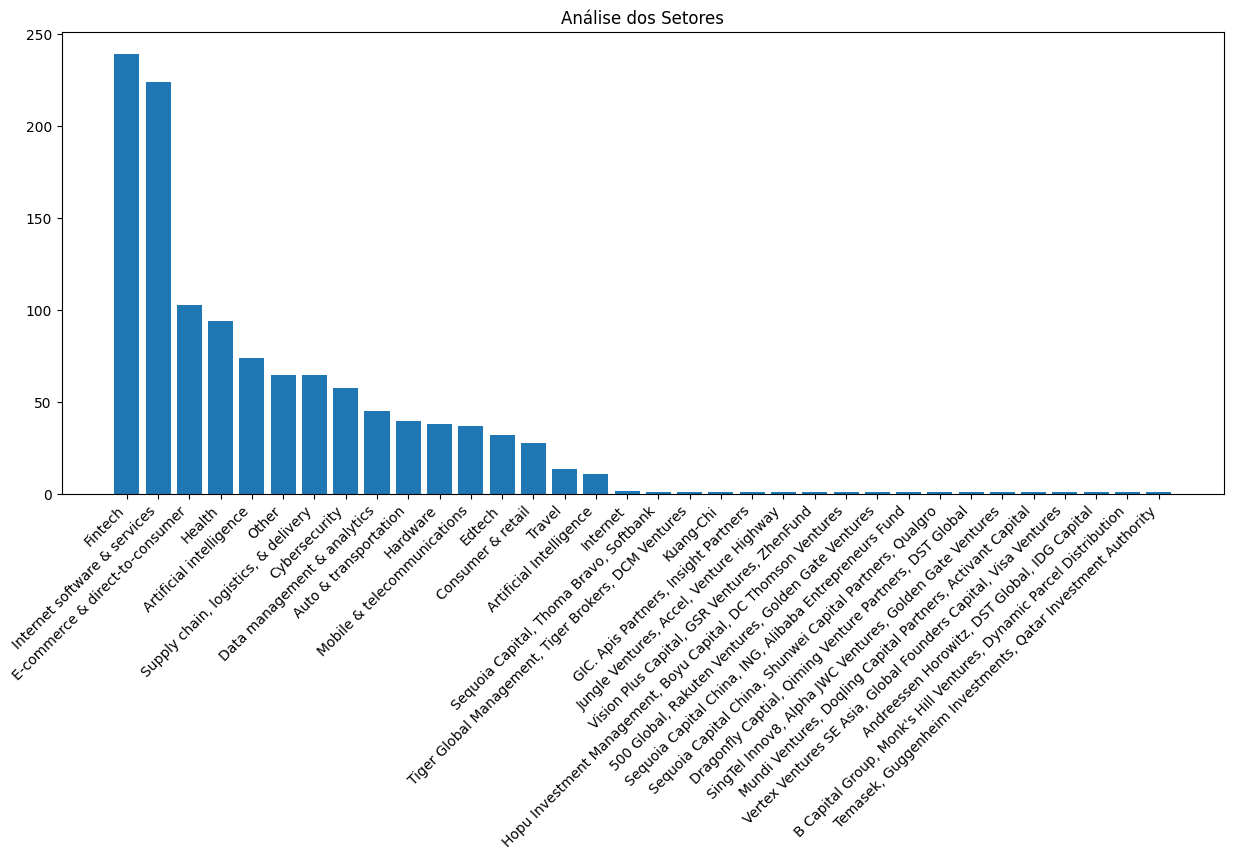

In [194]:
#Analise dos Setores
plt.figure(figsize=(15,6))
plt.title('Análise dos Setores')
plt.bar(Base_Dados['Setor'].value_counts().index, Base_Dados['Setor'].value_counts())
plt.xticks(rotation=45, ha='right')
plt.show()


In [195]:
#Analise dos Setores
Analise = round(Base_Dados['Pais'].value_counts( normalize=True ) * 100)

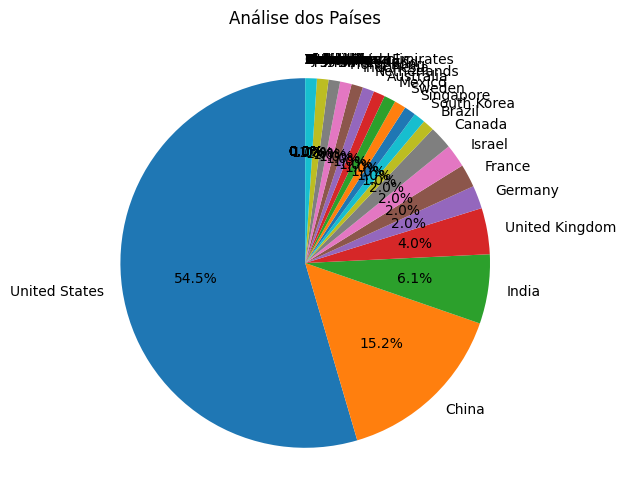

In [196]:
plt.figure(figsize=(15,6))
plt.title('Análise dos Países')
plt.pie(Analise,
        labels=Analise.index,
        startangle=90,
        autopct='%1.1f%%')
plt.xticks(rotation=45, ha='right')
plt.show()

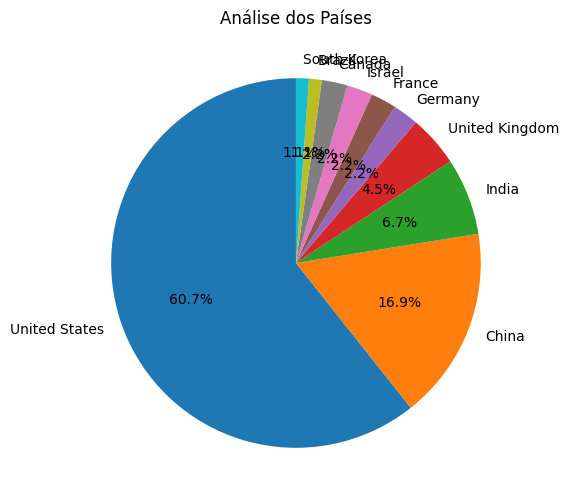

In [197]:
plt.figure(figsize=(15,6))
plt.title('Análise dos Países')
plt.pie(Analise.head(10),
        labels=Analise.index[0:10],
        startangle=90,
        autopct='%1.1f%%'
        )
plt.xticks(rotation=45, ha='right')

plt.show()

In [198]:
#Converção da Coluna Data
Base_Dados['Data de Adesão'] = pd.to_datetime(Base_Dados['Data de Adesão'])

In [199]:
#Extraindo Mês e Ano
Base_Dados['Mês'] = Base_Dados['Data de Adesão'].dt.month
Base_Dados['Ano'] = Base_Dados['Data de Adesão'].dt.year

Base_Dados.head(5)

,Empresa,Valor ($B),Data de Adesão,Pais,City,Setor,Investidores,Mês,Ano
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [200]:
#Tabela Analitica

Analise_Agrupada = Base_Dados.groupby(by=['Pais', 'Ano', 'Mês', 'Empresa']).count().reset_index()

In [201]:
#Filtrando por Pais
Analise_Agrupada.loc[Analise_Agrupada['Pais'] == 'Brazil']

,Pais,Ano,Mês,Empresa,Valor ($B),Data de Adesão,City,Setor,Investidores
16,Brazil,2018,7,Movile,1,1,1,1,1
17,Brazil,2018,11,iFood,1,1,1,1,1
18,Brazil,2019,6,Loggi,1,1,1,1,1
19,Brazil,2019,9,QuintoAndar,1,1,1,1,1
20,Brazil,2019,10,EBANX,1,1,1,1,1
21,Brazil,2019,12,Wildlife Studios,1,1,1,1,1
22,Brazil,2020,1,Loft,1,1,1,1,1
23,Brazil,2020,12,C6 Bank,1,1,1,1,1
24,Brazil,2020,12,Creditas,1,1,1,1,1
25,Brazil,2021,1,MadeiraMadeira,1,1,1,1,1


In [202]:
#Convertendo 'Valor ($B)' em Float
Base_Dados['Valor ($B)'] = pd.to_numeric(Base_Dados['Valor ($B)'].apply(lambda x: x.replace('$', '')))

In [203]:
Base_Dados.head()

,Empresa,Valor ($B),Data de Adesão,Pais,City,Setor,Investidores,Mês,Ano
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [216]:
#Tabela Analitica
Analise_Agrupada2 = Base_Dados.groupby(by=['Pais']).sum(numeric_only=True)['Valor ($B)'].reset_index()
Analise_Agrupada2.head()

,Pais,Valor ($B)
0,Argentina,2.45
1,Australia,54.40
2,Austria,7.61
3,Bahamas,32.00
4,Belgium,8.95


In [235]:
#Ordenando do Maior para o menor
Analise_Valor = Analise_Agrupada2.sort_values(by='Valor ($B)', ascending=False, inplace=True)

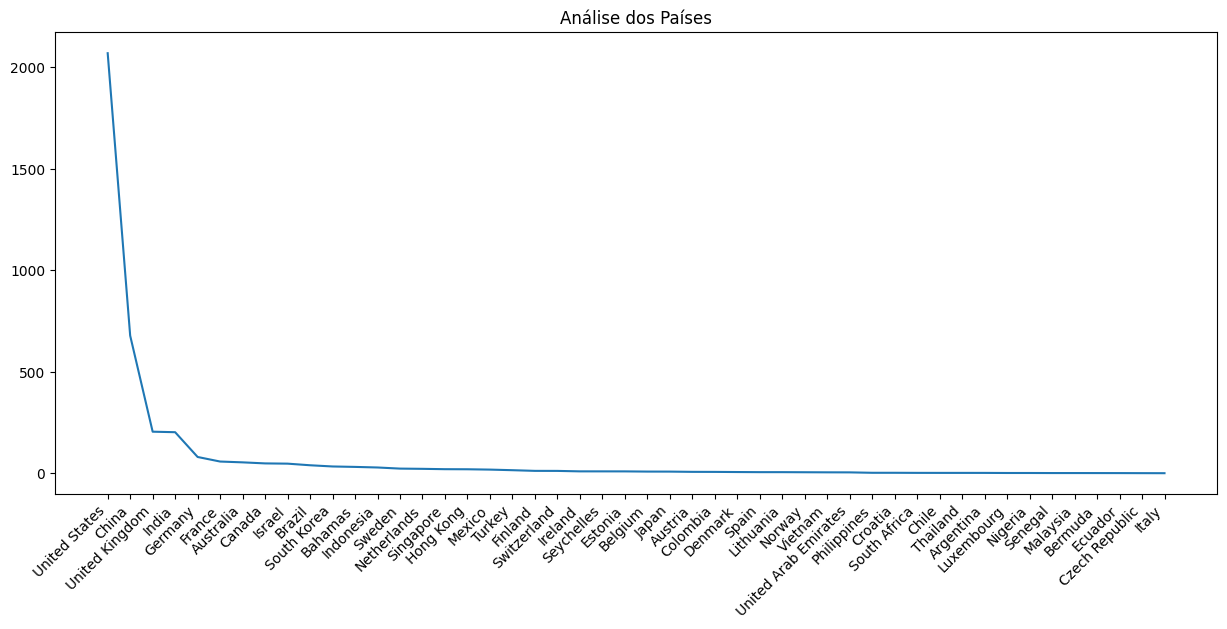

In [237]:
plt.figure(figsize=(15,6))
plt.title('Análise dos Países')
plt.plot(Analise_Agrupada2['Pais'], Analise_Agrupada2['Valor ($B)'])
plt.xticks(rotation=45, ha='right')
plt.show()